In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
class LinearDiscriminantAnalysis:
    
    def __init__(self,n):
        self.n = n
        self.ld = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        unique_cls_labels = np.unique(y)
        total_mean = np.mean(X, axis=0)
        in_cls_variance = np.zeros((n_features,n_features))
        btw_cls_variance = np.zeros((n_features,n_features))
        for label in unique_cls_labels:
            X_label = X[y == label]
            cls_mean = np.mean(X_label,axis=0)
            in_cls_variance = in_cls_variance + (X_label - cls_mean).T.dot(X_label - cls_mean)
            mean_diff = (cls_mean - total_mean).reshape(n_features,1)
            btw_cls_variance = btw_cls_variance + (X.shape[0] * (mean_diff.dot(mean_diff.T)))
        A = np.linalg.inv(in_cls_variance).dot(btw_cls_variance)
        eig_val,eig_vec = np.linalg.eig(A)
        eig_vec = eig_vec.T
        sorted_indices = np.argsort(abs(eig_val))[::-1]
        eig_val = eig_val[sorted_indices]
        eig_vec = eig_vec[sorted_indices]
        self.ld = eig_vec[0:self.n]
        
    
    def transform(self, X):
        return np.dot(X, self.ld.T)
    

In [3]:
iris_dataset = datasets.load_iris()
x = iris_dataset.data
y = iris_dataset.target
feature_names = iris_dataset.feature_names
target_classes = iris_dataset.target_names


In [4]:
lda = LinearDiscriminantAnalysis(2)
lda.fit(x,y)
x_proj = lda.transform(x)

In [5]:
x_proj.shape

(150, 2)

In [6]:
x.shape

(150, 4)

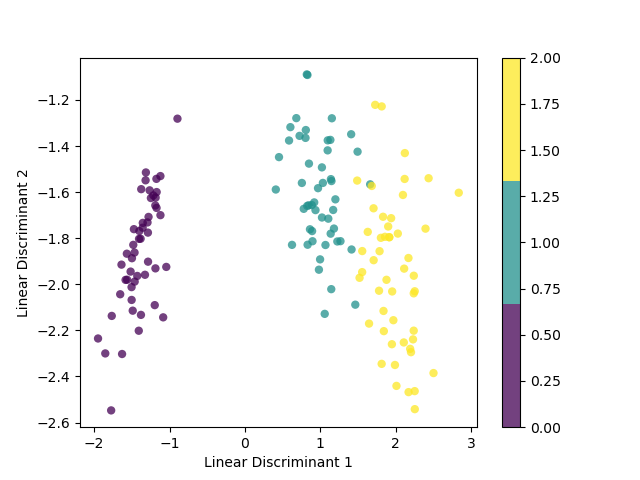

In [7]:
plt.scatter(x_proj[:,0],x_proj[:,1], c=y, edgecolor="none", alpha=0.75, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()